In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


/Users/siddharthnayak/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf

In [19]:
# Parameters
learning_rate = 0.001
training_epochs = 30
batch_size = 100
display_step = 1


In [4]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)


In [5]:
X=tf.placeholder(tf.float32,[None,n_input])
y=tf.placeholder(tf.float32,[None,n_classes])

In [6]:
def perceptron(x,weights,biases):
    with tf.name_scope('Layer1') as scope:
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.relu(layer_1)
    with tf.name_scope('Layer2') as scope:
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    with tf.name_scope('outputLayer') as scope:
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer
    

In [7]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [8]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [9]:
#For visualization in tensorboard
weights_h1_h=tf.summary.histogram('weights_1',weights['h1'])
weights_h2_h=tf.summary.histogram('weights_2',weights['h2'])
weights_out_h=tf.summary.histogram('weights_out',weights['out'])
biases_b1_h=tf.summary.histogram('Bias_1',biases['b1'])
biases_b2_h=tf.summary.histogram('Bias_2',biases['b2'])
biases_out_h=tf.summary.histogram('Bias_out',biases['out'])

In [10]:
with tf.name_scope('Perceptron') as scope:
    pred = perceptron(X, weights, biases)

In [11]:
with tf.name_scope('Cost_function_p') as scope:
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
    tf.summary.scalar('loss',cost)

In [12]:
with tf.name_scope('Optimizer_p') as scope:
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [13]:
# Initializing the variables
init = tf.global_variables_initializer()
merged_summary_op=tf.summary.merge_all()

In [20]:
#launch the graph
with tf.Session() as sess:
    sess.run(init)
    summary_writer=tf.summary.FileWriter('/Users/siddharthnayak/Downloads/logs/two',graph=sess.graph)
    #path to write tensorboard stuff
    #training
    for epoch in range(training_epochs):
        avg_cost=0.
        total_batch = int(mnist.train.num_examples/batch_size)
        #loop over the batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_x,y: batch_y})
            
            # Compute average loss
            avg_cost += c / total_batch
        summary_str=sess.run(merged_summary_op,feed_dict={X:batch_x,y:batch_y})
        summary_writer.add_summary(summary_str,epoch)
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
    print("Optimization Finished!")
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 154.449123315
Epoch: 0002 cost= 38.521269923
Epoch: 0003 cost= 23.840020909
Epoch: 0004 cost= 16.467004778
Epoch: 0005 cost= 11.846845925
Epoch: 0006 cost= 8.824975453
Epoch: 0007 cost= 6.371696632
Epoch: 0008 cost= 4.710081593
Epoch: 0009 cost= 3.516576687
Epoch: 0010 cost= 2.623568238
Epoch: 0011 cost= 1.888032854
Epoch: 0012 cost= 1.457431760
Epoch: 0013 cost= 1.084552721
Epoch: 0014 cost= 0.857493057
Epoch: 0015 cost= 0.657064221
Epoch: 0016 cost= 0.572777767
Epoch: 0017 cost= 0.474784574
Epoch: 0018 cost= 0.409825438
Epoch: 0019 cost= 0.409048934
Epoch: 0020 cost= 0.350911994
Epoch: 0021 cost= 0.404957144
Epoch: 0022 cost= 0.284768840
Epoch: 0023 cost= 0.261789651
Epoch: 0024 cost= 0.283680810
Epoch: 0025 cost= 0.296594244
Epoch: 0026 cost= 0.253807390
Epoch: 0027 cost= 0.247859735
Epoch: 0028 cost= 0.230545172
Epoch: 0029 cost= 0.251437170
Epoch: 0030 cost= 0.264875484
Optimization Finished!
Accuracy: 0.9556


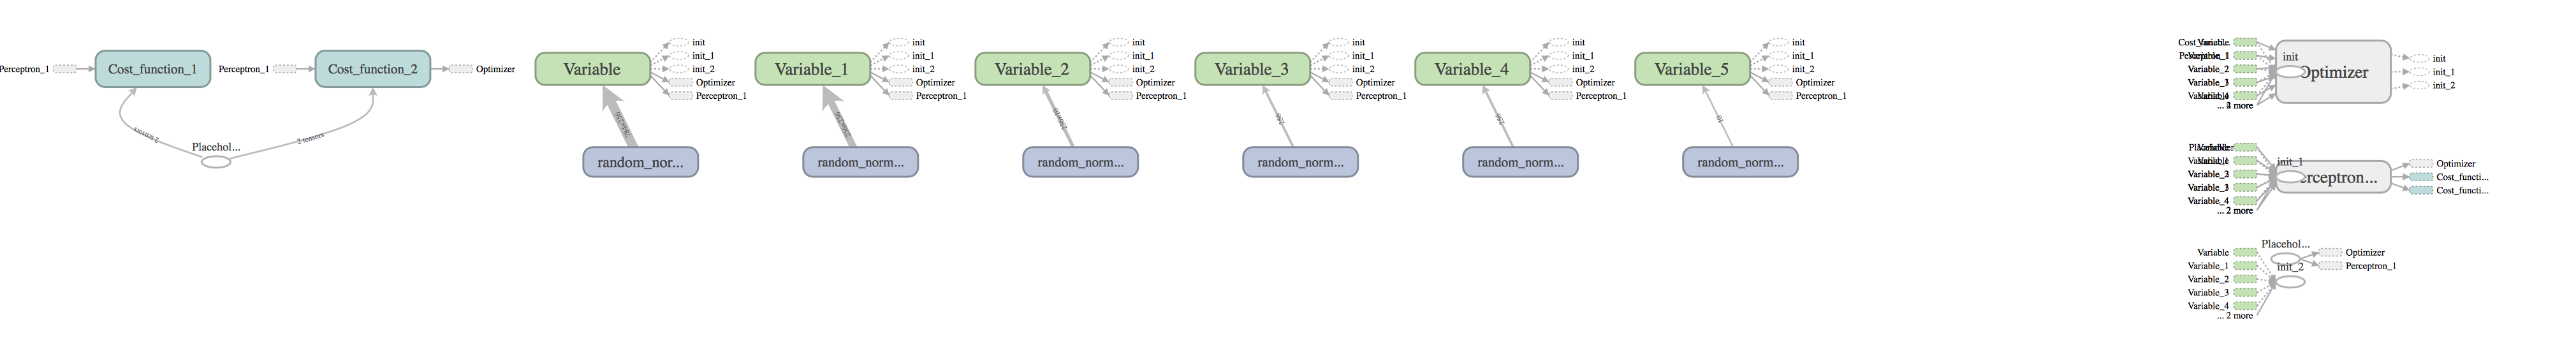

In [18]:
from IPython.display import Image
Image(filename='/Users/siddharthnayak/Downloads/graph?large_attrs_key=_too_large_attrs&limit_attr_size=1024&run=.png')

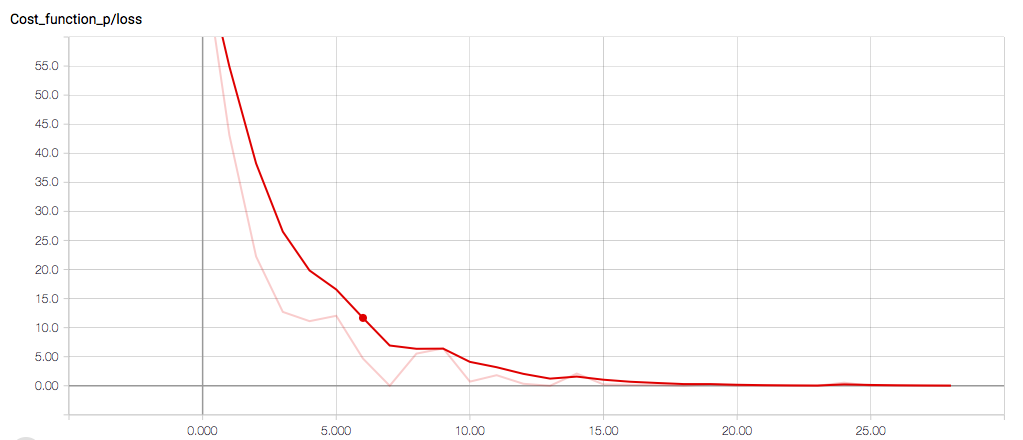

In [21]:
from IPython.display import Image
Image(filename='/Users/siddharthnayak/Desktop/Screen Shot 2018-03-20 at 1.14.03 AM.png')